<h1>Club Emailing List Data Set</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 26/09/2021</h4>

---

<p>This notebook explores the emailing data collected from club fair.</p>

---
<h2>Import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
<h2>Import data and put into DataFrame</h2>

In [2]:
df = pd.read_csv('/Users/dcoder/Downloads/Tech Club Signups (Responses) - Form Responses 1.csv') # your path!!

# changes questions to easier names
df['time'] = df['Timestamp']
df.drop('Timestamp', axis=1, inplace=True)
df['email'] = df['What is your email address?']
df.drop('What is your email address?', axis=1, inplace=True)
df['clubs'] = df['Which club email lists would you like to be added to?']
df.drop('Which club email lists would you like to be added to?', axis=1, inplace=True)

# identifying clubs from answer since answer is string
def club(x, target):
  if str(target) in str(x):
    return 1
  return 0

df['vex'] = df['clubs'].apply(lambda x: club(x, 'VEX Robotics'))
df['eve'] = df['clubs'].apply(lambda x: club(x, 'EVE Tech (Engineering Research Club!)'))
df['cs'] = df['clubs'].apply(lambda x: club(x, 'Computer Science Club'))
df['ai'] = df['clubs'].apply(lambda x: club(x, 'AI (Artificial Intelligence)'))
df['GIS'] = df['clubs'].apply(lambda x: club(x, 'GIS (Gender Inclusivity in STEM)'))

In [3]:
# check dataframe
df

,time,email,clubs,vex,eve,cs,ai,GIS
0,2021-09-24 18:48:04,schang23@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1
1,2021-09-24 19:53:05,aceballoscardona25@andover.edu,"EVE Tech (Engineering Research Club!), Compute...",0,1,1,1,1
2,2021-09-24 19:59:29,Atran24@andover.edu,Computer Science Club,0,0,1,0,0
3,2021-09-24 20:00:10,aomeara24@andover.edu,EVE Tech (Engineering Research Club!),0,1,0,0,0
4,2021-09-24 20:01:23,atollman24@andover.edu,AI (Artificial Intelligence),0,0,0,1,0
...,...,...,...,...,...,...,...,...
250,2021-09-24 21:27:45,abhakta22@andover.edu,VEX Robotics,1,0,0,0,0
251,2021-09-24 21:32:12,nhutchinson24@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1
252,2021-09-24 22:18:41,Rphillips25@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,0
253,2021-09-24 22:54:23,vgeorgieva23@andover.edu,AI (Artificial Intelligence),0,0,0,1,0


In [4]:
# quick exploratory analysis
df.groupby('clubs').sum()

,vex,eve,cs,ai,GIS
clubs,,,,,
AI (Artificial Intelligence),0,0,0,12,0
"AI (Artificial Intelligence), GIS (Gender Inclusivity in STEM)",0,0,0,4,4
Computer Science Club,0,0,33,0,0
"Computer Science Club, AI (Artificial Intelligence)",0,0,25,25,0
"Computer Science Club, AI (Artificial Intelligence), GIS (Gender Inclusivity in STEM)",0,0,7,7,7
"Computer Science Club, GIS (Gender Inclusivity in STEM)",0,0,8,0,8
EVE Tech (Engineering Research Club!),0,2,0,0,0
"EVE Tech (Engineering Research Club!), AI (Artificial Intelligence), GIS (Gender Inclusivity in STEM)",0,3,0,3,3
"EVE Tech (Engineering Research Club!), Computer Science Club",0,1,1,0,0


---
<h1>Data Exploration and Visualization</h1>
<h2>Getting number of members for each club</h2>

In [5]:
# number of sign ups
def members(club):
    member = 0
    for x in club:
        if x == 1:
            member += 1
    return member

print('cs: ', members(df['cs']))
print('ai: ', members(df['ai']))
print('vex: ', members(df['vex']))
print('gis: ', members(df['GIS']))
print('eve: ', members(df['eve']))

cs:  170
ai:  148
vex:  119
gis:  96
eve:  95


<AxesSubplot:>

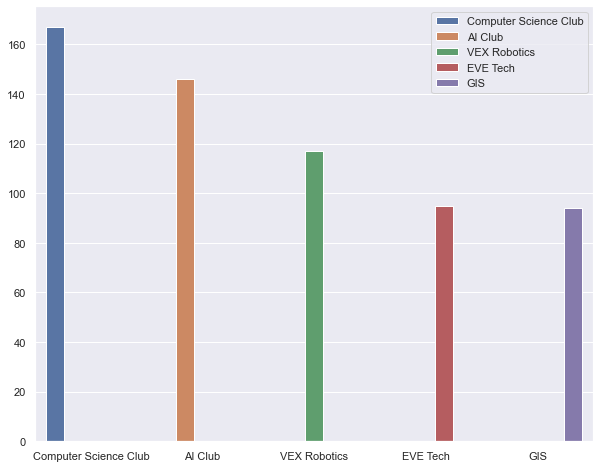

In [6]:
clubs = ['Computer Science Club', 'AI Club', 'VEX Robotics', 'EVE Tech', 'GIS']
members = [167, 146, 117, 95, 94]

sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x=clubs, y=members, hue=clubs)

The largest number of students signed up for Computer Science club, with AI club coming next.

---
<h2>Identifying student year for more analysis</h2>

In [7]:
# identifies student graduating year
def year(x):
    if '22' in x:
        return int(22)
    elif '23' in x:
        return int(23)
    elif '24' in x:
        return int(24)
    elif '25' in x:
        return int(25)
    return int(21)

df['year'] = df['email'].apply(year)
df['year'] = df['year'].apply(lambda x: int(x))

In [8]:
df.groupby('year').sum()

,vex,eve,cs,ai,GIS
year,,,,,
21,3,2,3,3,2
22,7,4,19,10,14
23,18,17,30,29,20
24,37,30,52,48,33
25,54,42,66,58,27


In [9]:
# identifying potential errors in inputting emails
df[df['year']==21]

,time,email,clubs,vex,eve,cs,ai,GIS,year
100,2021-09-24 20:27:40,Luke Piaescki,"VEX Robotics, Computer Science Club, AI (Artif...",1,0,1,1,0,21
156,2021-09-24 20:42:14,gharpole@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1,21
224,2021-09-24 21:08:18,yui h,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1,21


In [10]:
# cleaning errors
df.drop([100, 101], inplace=True)
df.drop([224, 225], inplace=True)
df.loc[df['email']=='yhasegawa23@andover.edu', 'vex'] = 1
df.loc[df['email']=='yhasegawa23@andover.edu', 'eve'] = 1
df.loc[df['email']=='yhasegawa23@andover.edu', 'cs'] = 1
df.loc[df['email']=='yhasegawa23@andover.edu', 'ai'] = 1
df.loc[df['email']=='yhasegawa23@andover.edu', 'GIS'] = 1
df.loc[df['email']=='gharpole@andover.edu', 'email'] = 'gharpole25@andover.edu'

In [11]:
# checking
df['year'] = df['email'].apply(year)
df['year'] = df['year'].apply(lambda x: int(x))
df[df['year']==21]

,time,email,clubs,vex,eve,cs,ai,GIS,year


---
<h2> Histogram of Number of Students who Signed Up for Clubs </h2>

(array([34.,  0.,  0., 53.,  0.,  0., 75.,  0.,  0., 89.]),
 array([22. , 22.3, 22.6, 22.9, 23.2, 23.5, 23.8, 24.1, 24.4, 24.7, 25. ]),
 <BarContainer object of 10 artists>)

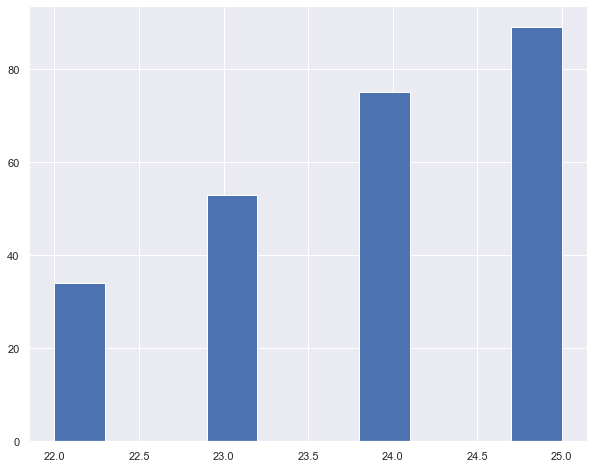

In [12]:
plt.hist(x=df['year'])

More lowerclassmen signed up for clubs than upperclassmen, despite having the smallest student population. 

In [13]:
ai_members = df[df['ai']==1]

In [14]:
ai_members

,time,email,clubs,vex,eve,cs,ai,GIS,year
0,2021-09-24 18:48:04,schang23@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1,23
1,2021-09-24 19:53:05,aceballoscardona25@andover.edu,"EVE Tech (Engineering Research Club!), Compute...",0,1,1,1,1,25
4,2021-09-24 20:01:23,atollman24@andover.edu,AI (Artificial Intelligence),0,0,0,1,0,24
5,2021-09-24 20:01:55,echo23@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1,23
8,2021-09-24 20:02:50,ryang23@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,0,1,0,23
...,...,...,...,...,...,...,...,...,...
248,2021-09-24 21:26:09,ghu24@andover.edu,"VEX Robotics, AI (Artificial Intelligence)",1,0,0,1,0,24
251,2021-09-24 21:32:12,nhutchinson24@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,1,24
252,2021-09-24 22:18:41,Rphillips25@andover.edu,"VEX Robotics, EVE Tech (Engineering Research C...",1,1,1,1,0,25
253,2021-09-24 22:54:23,vgeorgieva23@andover.edu,AI (Artificial Intelligence),0,0,0,1,0,23


(array([10.,  0.,  0., 29.,  0.,  0., 48.,  0.,  0., 59.]),
 array([22. , 22.3, 22.6, 22.9, 23.2, 23.5, 23.8, 24.1, 24.4, 24.7, 25. ]),
 <BarContainer object of 10 artists>)

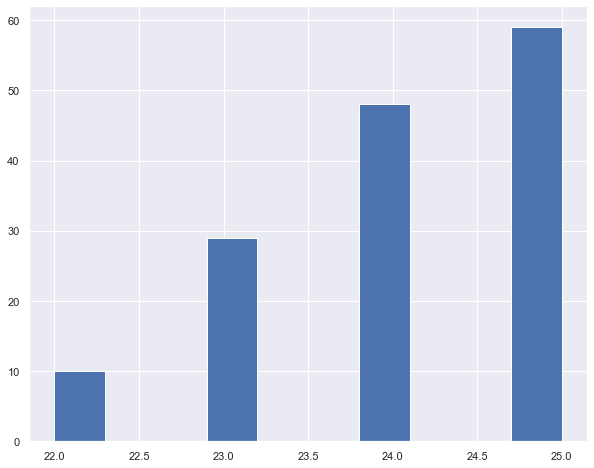

In [15]:
plt.hist(x=ai_members['year'])

Most people who joined AI club are lowerclassmen, with a disproportionatly small number of seniors signing up.

In [16]:
# for documentation/organising
ai_members.to_excel("ai_club_members.xlsx")

In [17]:
gis_members = df[df['GIS']==1]

In [18]:
gis_members.drop('time', axis=1, inplace=True)

/Users/dcoder/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
gis_members.drop('clubs', axis=1, inplace=True)
gis_members

,email,vex,eve,cs,ai,GIS,year
0,schang23@andover.edu,1,1,1,1,1,23
1,aceballoscardona25@andover.edu,0,1,1,1,1,25
5,echo23@andover.edu,1,1,1,1,1,23
7,nsalinas24@andover.edu,0,0,0,0,1,24
15,achiang24@andover.edu,1,1,1,1,1,24
...,...,...,...,...,...,...,...
243,saltomare23@andover.edu,0,0,1,1,1,23
245,mrowland24@andover.edu,0,0,0,1,1,24
246,aerickson25@andover.edu,1,1,1,1,1,25
247,kguo23@andover.edu,1,1,1,1,1,23


In [20]:
gis_members['email']

0                schang23@andover.edu
1      aceballoscardona25@andover.edu
5                  echo23@andover.edu
7              nsalinas24@andover.edu
15              achiang24@andover.edu
                    ...              
243           saltomare23@andover.edu
245            mrowland24@andover.edu
246           aerickson25@andover.edu
247                kguo23@andover.edu
251         nhutchinson24@andover.edu
Name: email, Length: 95, dtype: object

In [21]:
# for documentation/organising
gis_members.to_excel("gis_club_members.xlsx")

---
<h1> Conclusion </h1>

<p>This is a dataset of people who signed up for club fair. It will be useful for clustering algorithms (unsupervised) to identify the demographic of students in each club and which clubs to collaborate with in order to reach maximum number of audience. In this notebook, I imported the google form information and one-hot encoded the information for easier analysis. </p>